<a href="https://colab.research.google.com/github/karvs1458-gif/Inteligencia-Artificial/blob/main/Multicapa/Clasificaci%C3%B3n_De_Candidatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

#generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
#habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
#habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
#habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
#nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
#crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [ ]:
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,86,85,76,72,82,74,89,85,73,87,86,64,78,76,68,79,79,51
1,82,80,83,89,93,99,90,75,74,63,61,75,61,58,74,61,53,78
2,87,84,74,91,82,98,71,66,88,87,85,69,55,61,58,79,59,54
3,87,77,99,92,80,72,67,81,82,77,86,83,67,79,73,68,57,66
4,80,72,81,90,99,74,62,74,82,70,89,78,84,74,57,81,70,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,100,93,89,82,85,94,87,85,60,77,81,66,65,67,60,59,76,67
4996,97,93,99,92,87,97,72,83,71,65,76,76,74,66,64,76,55,76
4997,79,77,82,88,98,83,81,75,83,85,67,80,70,62,78,78,76,62
4998,76,88,99,84,77,85,87,79,73,62,85,64,82,75,50,72,53,53


In [ ]:
#calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
#promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
#etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
#one-hot encoding
y = pd.get_dummies(y).values

In [ ]:
y

array([[False,  True],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [ True, False],
       [ True, False]])

In [ ]:
#obtenemos los conjuntos de entrenamiento y de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

#escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# definimos la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#entrenamos en este caso con epocas
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9854 - loss: 0.1081 - val_accuracy: 0.9680 - val_loss: 0.0980
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accuracy: 0.9730 - val_loss: 0.0658
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9873 - loss: 0.0309 - val_accuracy: 0.9710 - val_loss: 0.0714
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9873 - loss: 0.0283 - val_accuracy: 0.9670 - val_loss: 0.0705
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9680 - val_loss: 0.0879
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9925 - loss: 0.0188 - val_accuracy: 0.9680 - val_loss: 0.0975
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9941 - loss: 0.0198 - val_accuracy: 0.9700 - val_loss: 0.0755
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9952 - loss: 0

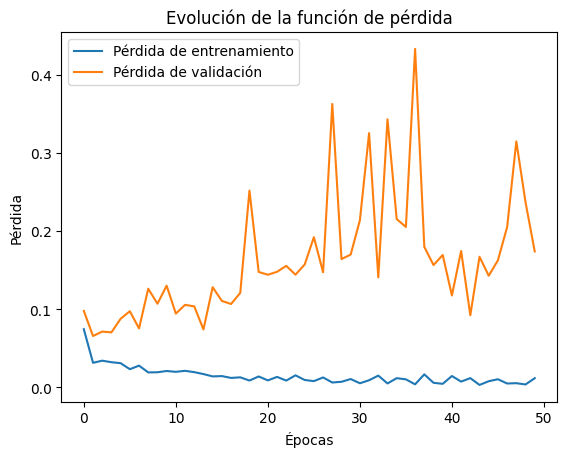

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9639 - loss: 0.1766

🔹 Loss: 0.1742  |  Accuracy: 0.9650


In [ ]:
#hacemos una grafica para evaluar
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


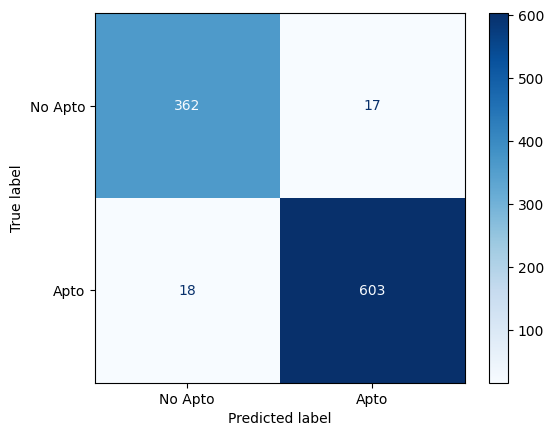


Sensitivity (Recall) por clase:
No Apto: 0.96
Apto: 0.97


In [ ]:
#creamos nuestra matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")